In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynmrstar


In [2]:
entry = pynmrstar.Entry.from_database(17919)

bmrb_cs = {}
bmrb_seq = {}

#loop = entry.get_loops_by_category('Atom_chem_shift')
    
elems = [cs.get_tag(['Seq_ID', 'Comp_ID', 'Atom_ID', 'Val']) for cs in entry.get_loops_by_category('Atom_chem_shift')]

for seq_id, res, atom, shift in map(tuple, elems[0]):
    seq_id = int(seq_id)
    shift = float(shift)
    
    if seq_id not in bmrb_cs:
        bmrb_cs[seq_id] = {}
        bmrb_seq[seq_id] = res

    bmrb_cs[seq_id][atom] = shift

In [3]:
procs = np.load('2lj5_shieldings.npy')

In [4]:
print(procs.shape)

(301, 76, 6)


In [5]:
procs_mean = np.mean(procs, axis = 0)
print(procs_mean)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.34377322e+02  1.52828843e+02  4.00385572e+01  1.46438300e+02
   2.87068708e+01  2.66533577e+01]
 [ 1.36271653e+02  1.53233225e+02  4.06095984e+01  1.41865000e+02
   2.75414711e+01  2.68117394e+01]
 [ 1.27574211e+02  1.60994426e+02  3.58376214e+01  1.41314684e+02
   2.67922022e+01  2.76980111e+01]
 [ 1.37045457e+02  1.61040581e+02  3.77037189e+01  1.44174557e+02
   2.83338406e+01  2.67235448e+01]
 [ 1.32851064e+02  1.23821734e+02  3.94855634e+01  1.42305701e+02
   2.69420913e+01  2.69133107e+01]
 [ 1.36048371e+02  1.53065108e+02  3.69099655e+01  1.36742177e+02
   2.57565333e+01  2.65270158e+01]
 [ 1.32632837e+02  1.22622736e+02  3.65076122e+01  1.50652339e+02
   2.21540095e+01  2.64714975e+01]
 [ 1.46521135e+02  1.21567438e-01  3.91489727e+01  1.55203574e+02
   2.70038583e+01  2.7464

In [14]:
procs_ca = []
procs_cb = []
procs_co = []
procs_n = []
procs_hn = []
procs_ha = []


bmrb_ca = []
bmrb_cb = []
bmrb_co = []
bmrb_n = []
bmrb_hn = []
bmrb_ha = []

for i in range(2, 72):
    seq_id = i + 1

    try:
        bmrb_ca.append(bmrb_cs[seq_id]['CA'])
        procs_ca.append(procs_mean[i, 0])
    except:
        pass

    try:
        bmrb_co.append(bmrb_cs[seq_id]['C'])
        procs_co.append(procs_mean[i, 2])
    except:
        pass
    
    if  bmrb_seq[seq_id] != 'PRO':
        try:
            bmrb_n.append(bmrb_cs[seq_id]['N'])
            procs_n.append(procs_mean[i, 3])
        except:
            pass

        try:
            bmrb_hn.append(bmrb_cs[seq_id]['H'])
            procs_hn.append(procs_mean[i, 4])
        except:
            pass
    if  bmrb_seq[seq_id] == 'GLY':
        try:
            bmrb_ha.append(bmrb_cs[seq_id]['HA2'])
            procs_ha.append(procs_mean[i, 5])
        except:
            pass
    else:
        try:
            bmrb_cb.append(bmrb_cs[seq_id]['CB'])
            procs_cb.append(procs_mean[i, 1])
        except:
            pass
        
        try:    
            bmrb_ha.append(bmrb_cs[seq_id]['HA'])
            procs_ha.append(procs_mean[i, 5])
        except:
            pass

procs_ca = np.array(procs_ca)
procs_cb = np.array(procs_cb)
procs_co = np.array(procs_co)
procs_n = np.array(procs_n)
procs_hn = np.array(procs_hn)
procs_ha = np.array(procs_ha)

bmrb_ca = np.array(bmrb_ca)
bmrb_cb = np.array(bmrb_cb)
bmrb_co = np.array(bmrb_co)
bmrb_n = np.array(bmrb_n)
bmrb_hn = np.array(bmrb_hn)
bmrb_ha = np.array(bmrb_ha)

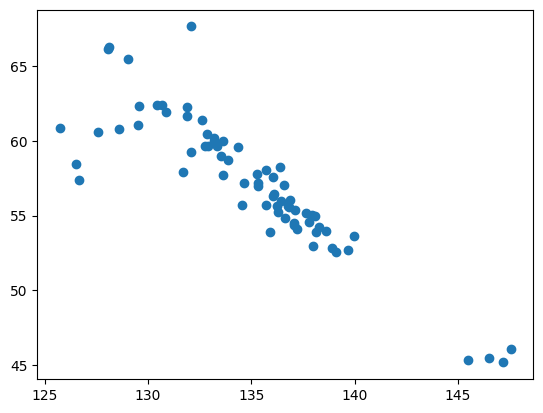

In [15]:
plt.scatter(procs_ca, bmrb_ca)

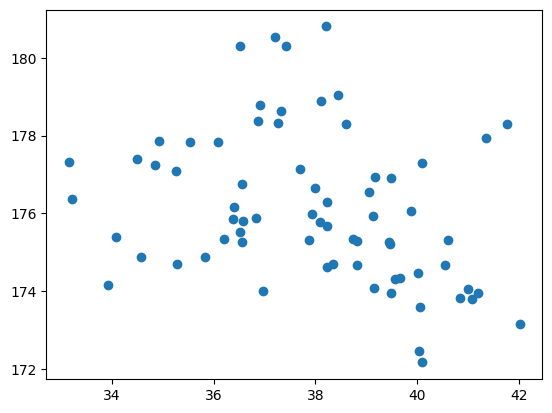

In [16]:
plt.scatter(procs_co, bmrb_co)

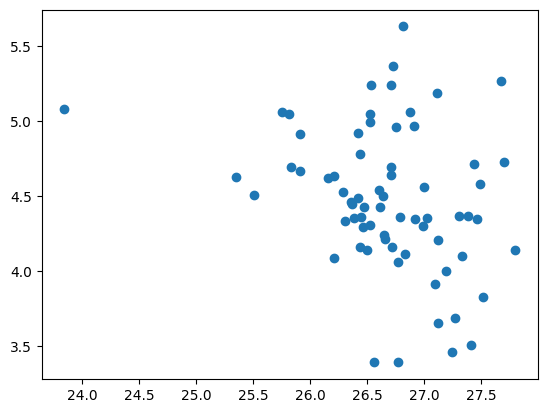

In [17]:
plt.scatter(procs_ha, bmrb_ha)

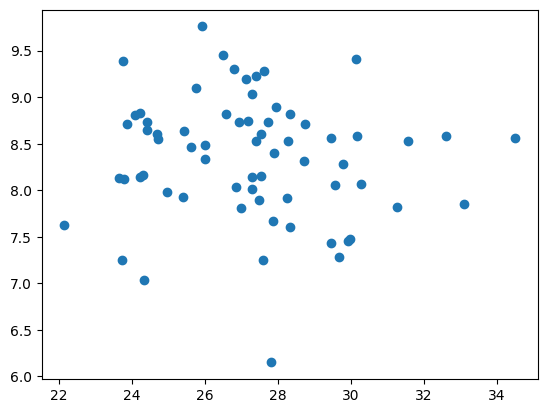

In [18]:
plt.scatter(procs_hn, bmrb_hn)

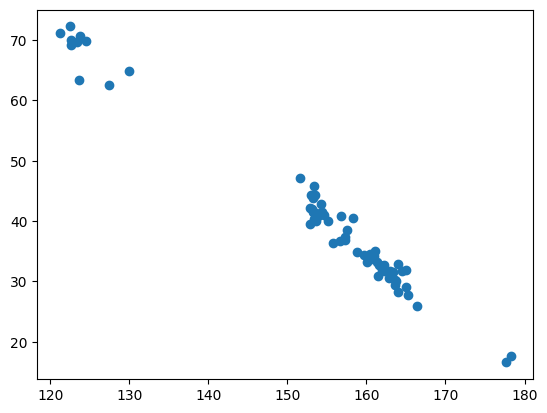

In [19]:
plt.scatter(procs_cb, bmrb_cb)

In [20]:
from numpy.polynomial import Polynomial

In [21]:
co_reg = np.polyfit(procs_co, bmrb_co, 1)

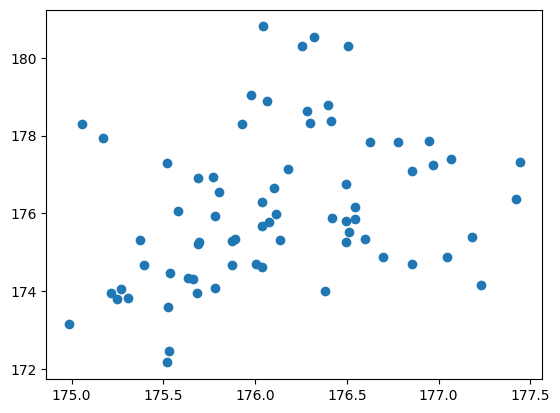

In [22]:
plt.scatter(co_reg[0] * procs_co + co_reg[1], bmrb_co)

In [27]:
co_rmsd = np.linalg.norm(co_reg[0] * procs_co + co_reg[1] - bmrb_co) / np.sqrt(len(procs_co))

In [28]:
print(co_rmsd)

1.8330688574445613


In [29]:
ca_reg = np.polyfit(procs_ca, bmrb_ca, 1)
cb_reg = np.polyfit(procs_cb, bmrb_cb, 1)

ca_rmsd = np.linalg.norm(ca_reg[0] * procs_ca + ca_reg[1] - bmrb_ca) / np.sqrt(len(procs_ca))
cb_rmsd = np.linalg.norm(cb_reg[0] * procs_cb + cb_reg[1] - bmrb_cb) / np.sqrt(len(procs_cb))



In [30]:
print(ca_rmsd)
print(cb_rmsd)

2.048706822762868
1.8753557658763087
